# 1. Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix,accuracy_score
# !pip install git+http://github.com/scikit-learn/scikit-learn.git
# from sklearn.metrics import multilabel_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# 2. Importar set de entrenamiento y Limpieza

In [2]:
data_train = pd.read_json('train.json')
data_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
data_train['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [4]:
type(data_train['ingredients'][0])

list

Primero se necesita una columna con un string de ingredientes.

In [5]:
#data_train['ingr_lst'] = data_train['ingredients'].apply(lambda x: [item.replace(' ','') for item in x])

In [6]:
data_train['ingr_str'] = data_train['ingredients'].apply(lambda x: ' '.join(x))
data_train.head()

,cuisine,id,ingredients,ingr_str
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...


In [7]:
# data_train['ingr_str2'] = data_train['ingredients'].apply(lambda x: ' '.join(x))
# data_train.head()

In [8]:
data_train['cant_ingr'] = data_train['ingredients'].str.len()
# data_train.head()

 Vamos a eliminar las recetas vistas en el EDA que tienen sólo 1 ingrediente y aquellas mayores a 30

In [9]:
data_train.drop(index=data_train.loc[data_train['cant_ingr']>30].index, inplace=True)

In [10]:
data_train.drop(index=data_train.loc[data_train['cant_ingr']==1].index, inplace=True)

In [11]:
data_train.head()

,cuisine,id,ingredients,ingr_str,cant_ingr
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...,9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...,11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...,12
3,indian,22213,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt,4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...,20


In [12]:
data_train.shape

(39712, 5)

Ya que los ingredientes a veces vienen como 2 palabras juntas, se decidió tomar esta representación. Luego se harán pruebas tomando la otra columna.

In [13]:
X = data_train['ingr_str']
y = data_train['cuisine']

# 3. Split en Train y Test

Para armar y validar el modelo dividimos los datos del archivo 'train.json' en train y test. Luego de haber probado y elegido el mejor modelo posible, se realizarán predicciones sobre un nuevo set de datos del archivo 'test.json', del cual no se conocen las etiquetas.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [15]:
X.shape,y.shape

((39712,), (39712,))

In [16]:
X_train.shape,y_train.shape

((29784,), (29784,))

In [17]:
X_test.shape,y_test.shape

((9928,), (9928,))

In [18]:
y_train.value_counts()

italian         5876
mexican         4818
southern_us     3238
indian          2244
chinese         2003
french          1982
cajun_creole    1158
thai            1150
japanese        1064
greek            881
spanish          740
korean           622
vietnamese       617
moroccan         614
british          603
filipino         565
irish            500
jamaican         393
russian          367
brazilian        349
Name: cuisine, dtype: int64

In [19]:
y_test.value_counts()

italian         1958
mexican         1606
southern_us     1079
indian           748
chinese          668
french           661
cajun_creole     386
thai             383
japanese         355
greek            293
spanish          246
korean           208
vietnamese       206
moroccan         205
british          201
filipino         189
irish            167
jamaican         131
russian          122
brazilian        116
Name: cuisine, dtype: int64

# 4. Pruebas con CountVectorizer y TfidfVectorizer

In [20]:
vec = CountVectorizer(lowercase=True,stop_words='english',token_pattern=r'(?u)\b\w\w\w+\b',
                       ngram_range=(1,2),max_features=20000)

X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)
len(vec.get_feature_names())

20000

In [21]:
X_train_vec.shape

(29784, 20000)

In [22]:
X_test_vec.shape

(9928, 20000)

In [23]:
tfidf = TfidfVectorizer(lowercase=True,stop_words='english',token_pattern=r'(?u)\b\w\w\w+\b',
                       ngram_range=(1,2),max_features=20000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
len(tfidf.get_feature_names())

20000

In [24]:
X_train_tfidf.shape

(29784, 20000)

In [25]:
X_test_tfidf.shape

(9928, 20000)

In [26]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [27]:
feat_selector=SelectPercentile(f_classif, percentile=15)
feat_selector=feat_selector.fit(X_train_vec, y_train)
X_train_vec=feat_selector.transform(X_train_vec)
#CHEQUEAR VARIABLES QUE FITEAN Y TRANSFORMAN!!!!!!! 
X_train_vec.shape

(29784, 3000)

In [28]:
feat_selector=SelectPercentile(f_classif, percentile=15)
feat_selector=feat_selector.fit(X_train_tfidf, y_train)
X_train_tfidf=feat_selector.transform(X_train_tfidf)
X_train_tfidf.shape

(29784, 3000)

In [29]:
X_test_vec=feat_selector.transform(X_test_vec)

In [30]:
X_test_tfidf=feat_selector.transform(X_test_tfidf)

In [31]:
#vec.vocabulary_
#tfidf.vocabulary

# 5. Pruebas con Logistic Regresion

In [32]:
# Modelo Features tratadas con Countvectorizer
modelo_LR_vec = LogisticRegression()
modelo_LR_vec.fit(X_train_vec, y_train)
y_pred_LR_vec = modelo_LR_vec.predict(X_test_vec)

print("Accuracy sobre Train: {}".format(accuracy_score(y_train, modelo_LR_vec.predict(X_train_vec))))
print("Accuracy sobre Test: {}".format(accuracy_score(y_test, y_pred_LR_vec)))



C:\Users\Noe\Anaconda3II\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Noe\Anaconda3II\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy sobre Train: 0.8696951383293043
Accuracy sobre Test: 0.10505640612409348


In [33]:
# Modelo Features tratadas con tfidf

modelo_LR_tfidf = LogisticRegression()
modelo_LR_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = modelo_LR_tfidf.predict(X_test_tfidf)

print("Accuracy sobre Train: {}".format(accuracy_score(y_train, modelo_LR_tfidf.predict(X_train_tfidf))))
print("Accuracy sobre Test: {}".format(accuracy_score(y_test, y_pred_tfidf)))


Accuracy sobre Train: 0.7841794251947354
Accuracy sobre Test: 0.7520145044319098


# 6. Búsqueda de los mejores parámetros


Se probarán los parámetros del vectorizer:
 - max_features
 - ngram_range
 - stop_words
 - binary
 - token_pattern
 
Feature Selection:
 - Distintos valores de percentil
 
Modelo:
 - Valores del hiperparámetro C

Vamos a hacer pipelines para que ejecute con Random Search y con GridSearch. Si bien uno reemplaza al otro en su uso, es sólo de modo "experimental" para apreciar las ventajas y desventajas de uno y otro

In [34]:
from sklearn.pipeline import Pipeline

pipeline1 = Pipeline([
   ('vect', CountVectorizer()), 
    ('ftr', SelectPercentile()),
   ('clf', LogisticRegression()), 
   ])

pipeline2 = Pipeline([ 
   ('vect', TfidfVectorizer()), 
   ('ftr', SelectPercentile()),
   ('clf', LogisticRegression()),
   
])


In [35]:
parameters = {
    'vect__max_features': [15000,20000,25000,30000],
    'vect__stop_words': ['english'],# None],
    'vect__binary': [True,False],
    'vect__token_pattern' : [r'(?u)\b\w\w\w+\b'],
    #'clf__penalty': ['l1', 'l2'],
    'clf__class_weight': ['balanced'],
    'clf__C': [1, 10, 10000, 1e10],
    'ftr__percentile':[10, 15, 20, 25],
    'ftr__score_func':[f_classif], 
}

In [36]:
random_search1 = RandomizedSearchCV (pipeline1, parameters,n_iter=5, n_jobs = -1 , verbose = 2 , cv=5)
random_search2 = RandomizedSearchCV (pipeline2, parameters,n_iter=5, n_jobs = -1 , verbose = 2 , cv=5)


In [37]:
print("Performing Randomized Search 1...") 
random_search1.fit(X_train, y_train)

print("Best score: %0.3f" % random_search1.best_score_) 
print("Best parameters set:" )
best_parameters = random_search1.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Performing Randomized Search 1...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 16.4min finished
C:\Users\Noe\Anaconda3II\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Noe\Anaconda3II\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best score: 0.751
Best parameters set:
	 clf__C: 1
	 clf__class_weight: 'balanced'
	 ftr__percentile: 25
	 ftr__score_func: <function f_classif at 0x000000245C23BA60>
	 vect__binary: False
	 vect__max_features: 30000
	 vect__stop_words: 'english'
	 vect__token_pattern: '(?u)\\b\\w\\w\\w+\\b'


In [38]:
print("Performing Randomized Search 2...") 
random_search2.fit(X_train, y_train)

print("Best score: %0.3f" % random_search2.best_score_) 
print("Best parameters set:" )
best_parameters = random_search2.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Performing Randomized Search 2...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.8min finished
C:\Users\Noe\Anaconda3II\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Noe\Anaconda3II\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best score: 0.748
Best parameters set:
	 clf__C: 10
	 clf__class_weight: 'balanced'
	 ftr__percentile: 20
	 ftr__score_func: <function f_classif at 0x000000245C23BA60>
	 vect__binary: True
	 vect__max_features: 15000
	 vect__stop_words: 'english'
	 vect__token_pattern: '(?u)\\b\\w\\w\\w+\\b'


Vamos a correr ahora una Grilla con parametros mas cercanos de acuerdo a los resultados del Random y seguimos probando con algunos hiperparámetros adicionales del Countvectorizer y TfidfVectorizer
Confiamos que el score se optimizará con C=>10 features=>25000, binarizando

In [39]:
parameters2 = {
    'vect__max_features': [20000, 25000, 30000],
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__stop_words': ['english'], # None],
    'vect__binary': [True],#False],
    'vect__token_pattern' : [r'(?u)\b\w\w\w+\b'],
    'clf__class_weight': ['balanced'],
    #'clf__penalty': ['l2'],
    'clf__C': [10, 10000, 1e10],
    'ftr__percentile':[15, 20, 25],
    'ftr__score_func':[f_classif], 
}

  

In [40]:
grid_search1 = GridSearchCV (pipeline1, parameters2, n_jobs = 4 , verbose = 2 , cv=5)
grid_search2 = GridSearchCV (pipeline2, parameters2, n_jobs = 4 , verbose = 2 , cv=5)


In [41]:
print("Performing grid search1...") 
grid_search1.fit(X_train, y_train)

print("Best score LR-CountVectorizer: %0.3f" % grid_search1.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search1.best_estimator_.get_params()
for param_name in sorted (parameters2 .keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Performing grid search1...
Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  8.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 89.9min
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed: 193.0min finished
C:\Users\Noe\Anaconda3II\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Noe\Anaconda3II\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best score LR-CountVectorizer: 0.749
Best parameters set:
	 clf__C: 10
	 clf__class_weight: 'balanced'
	 ftr__percentile: 25
	 ftr__score_func: <function f_classif at 0x000000245C23BA60>
	 vect__binary: True
	 vect__max_features: 30000
	 vect__ngram_range: (1, 2)
	 vect__stop_words: 'english'
	 vect__token_pattern: '(?u)\\b\\w\\w\\w+\\b'


In [42]:
print("Performing grid search2...") 
grid_search2.fit(X_train, y_train)

print("Best score LR-tfidf Vectorizer: %0.3f" % grid_search2.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search2.best_estimator_.get_params()
for param_name in sorted (parameters2 .keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Performing grid search2...
Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 27.3min
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed: 83.8min finished
C:\Users\Noe\Anaconda3II\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Noe\Anaconda3II\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best score LR-tfidf Vectorizer: 0.775
Best parameters set:
	 clf__C: 10
	 clf__class_weight: 'balanced'
	 ftr__percentile: 25
	 ftr__score_func: <function f_classif at 0x000000245C23BA60>
	 vect__binary: True
	 vect__max_features: 30000
	 vect__ngram_range: (1, 2)
	 vect__stop_words: 'english'
	 vect__token_pattern: '(?u)\\b\\w\\w\\w+\\b'


In [43]:
grid_search2.best_estimator_

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=30000,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patte...
                ('ftr',
                 SelectPercentile(percentile=25,
                                  score_func=<function f_classif at 0x000000245C23BA60>)),
                ('clf',
                 LogisticRegression(C=10, class_weight='balanced', dual=False,
                                   

In [44]:
print(grid_search2.best_estimator_)
print(grid_search2.best_score_)
print(grid_search2.best_params_)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=30000,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patte...
                ('ftr',
                 SelectPercentile(percentile=25,
                                  score_func=<function f_classif at 0x000000245C23BA60>)),
                ('clf',
                 LogisticRegression(C=10, class_weight='balanced', dual=False,
                                   

In [45]:
print(grid_search2.best_params_['vect__binary'],grid_search2.best_params_['vect__max_features'])
print(grid_search2.best_params_['vect__ngram_range'],grid_search2.best_params_['vect__stop_words'])
print(grid_search2.best_params_['vect__token_pattern'])

True 30000
(1, 2) english
(?u)\b\w\w\w+\b


In [46]:
pipeline_best = Pipeline([
   ('vect', TfidfVectorizer(binary=grid_search2.best_params_['vect__binary'],
                            max_features=grid_search2.best_params_['vect__max_features'],
                            ngram_range=grid_search2.best_params_['vect__ngram_range'],
                            stop_words=grid_search2.best_params_['vect__stop_words'],
                            token_pattern=grid_search2.best_params_['vect__token_pattern'])),
    ('ftr', SelectPercentile(percentile=grid_search2.best_params_['ftr__percentile'],
                            score_func = grid_search2.best_params_[ 'ftr__score_func'])),
    ('clf', LogisticRegression(C=grid_search2.best_params_['clf__C'],
                             class_weight=grid_search2.best_params_['clf__class_weight']))
])


In [47]:
pipeline_best.fit(X_train,y_train)
pred=pipeline_best.predict(X_test)

print("Accuracy sobre Test: {}".format(accuracy_score(y_test, pred)))

C:\Users\Noe\Anaconda3II\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Noe\Anaconda3II\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy sobre Test: 0.7744762288477035


In [48]:
grid_search2.best_estimator_.fit(X_train,y_train)
y_pred=grid_search2.best_estimator_.predict(X_test)

print("Accuracy sobre Test: {}".format(accuracy_score(y_test, y_pred)))

C:\Users\Noe\Anaconda3II\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Noe\Anaconda3II\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy sobre Test: 0.7744762288477035


In [49]:
cuisines = data_train['cuisine'].value_counts().index.copy()
cuisines

#y_test.value_counts().index.copy()

Index(['italian', 'mexican', 'southern_us', 'indian', 'chinese', 'french',
       'cajun_creole', 'thai', 'japanese', 'greek', 'spanish', 'korean',
       'vietnamese', 'moroccan', 'british', 'filipino', 'irish', 'jamaican',
       'russian', 'brazilian'],
      dtype='object')

In [50]:
y_test.value_counts().index.copy()

Index(['italian', 'mexican', 'southern_us', 'indian', 'chinese', 'french',
       'cajun_creole', 'thai', 'japanese', 'greek', 'spanish', 'korean',
       'vietnamese', 'moroccan', 'british', 'filipino', 'irish', 'jamaican',
       'russian', 'brazilian'],
      dtype='object')

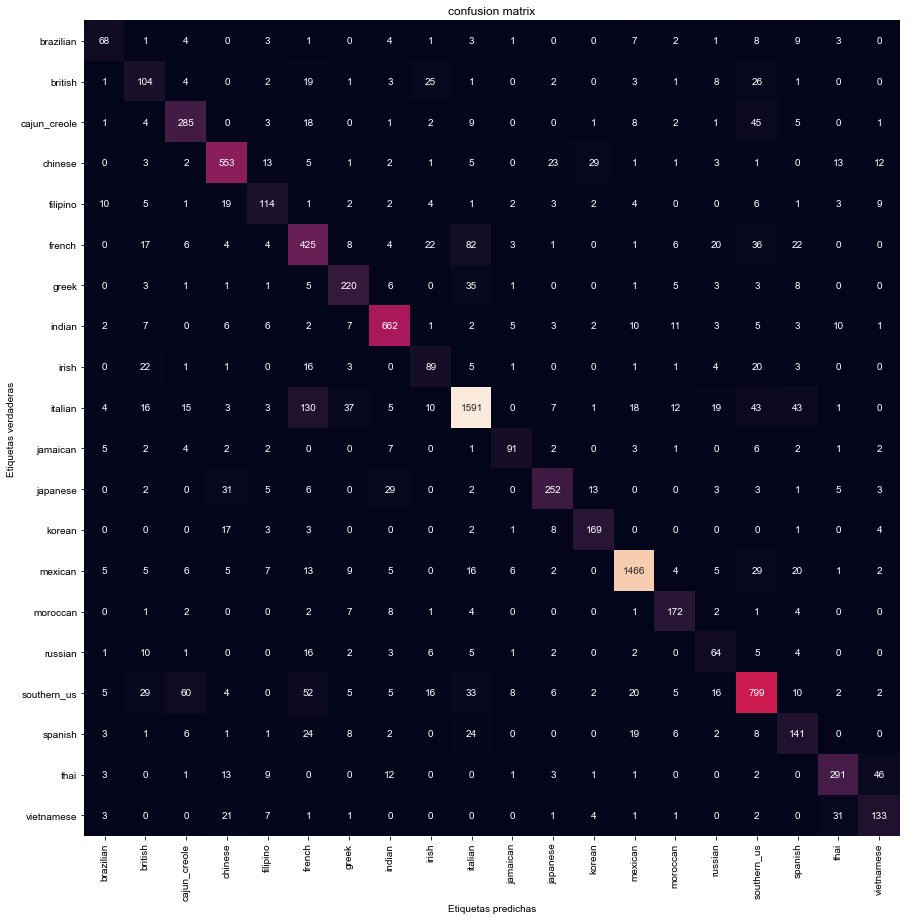

In [51]:
from sklearn.utils.multiclass import unique_labels

plt.figure(figsize=(15, 15))
classes = unique_labels(y_test, y_pred)
plt.title("confusion matrix")

mat = confusion_matrix(y_test, y_pred)
ax=sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
sns.set(font_scale=2) 

plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
ax.set_xticklabels(classes,rotation=90)
ax.set_yticklabels(classes,rotation=0);

plt.savefig('LR Final sin scaler.jpg', dpi=300)

# #117 brazil
# #201 british


#explicacion para eliminar
En el horizontal están las etiquetas verdaderas = hay 116 registros de cocina brasilera en el Test-set y es el support
en la vertical, esta todo lo que predijo como brasilero y su origen, son un total de 75 datos.
los TP son 59 datos


59/75 es el precision (todo lo que se predijo bien y sobre la prediccion de brasilero)
59/117 es el recall - los datos que acertó, sobre la totalidad de datos brasileros


In [52]:
from sklearn.metrics import classification_report


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   brazilian       0.61      0.59      0.60       116
     british       0.45      0.52      0.48       201
cajun_creole       0.71      0.74      0.73       386
     chinese       0.81      0.83      0.82       668
    filipino       0.62      0.60      0.61       189
      french       0.58      0.64      0.61       661
       greek       0.71      0.75      0.73       293
      indian       0.87      0.89      0.88       748
       irish       0.50      0.53      0.52       167
     italian       0.87      0.81      0.84      1958
    jamaican       0.75      0.69      0.72       131
    japanese       0.80      0.71      0.75       355
      korean       0.75      0.81      0.78       208
     mexican       0.94      0.91      0.92      1606
    moroccan       0.75      0.84      0.79       205
     russian       0.42      0.52      0.46       122
 southern_us       0.76      0.74      0.75      1079
     spanish       0.51    